In [1]:
import subprocess
import sys

# Function to install a package without showing output
def install_package(package_name):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name, "--quiet"])

# Install yfinance without showing output
install_package("yfinance")
install_package("arch")
install_package("tensorflow")
install_package("keras")


In [2]:
import yfinance as yf

# List of Yahoo Finance tickers
tickers = [
    "0728.HK", "1211.HK", "0857.HK", "0386.HK", "1171.HK", "0168.HK",
    "0902.HK", "0914.HK", "2600.HK", "0358.HK", "2883.HK", "1055.HK",
    "0921.HK", "1138.HK", "0670.HK", "0576.HK", "0177.HK", "0696.HK",
    "0991.HK", "0317.HK", "0548.HK", "0694.HK", "0995.HK", "0874.HK",
    "0338.HK", "1385.HK", "1072.HK", "0107.HK", "1033.HK",
    "0525.HK", "0038.HK", "0323.HK", "0347.HK", "1133.HK"
]

# Data availability check
def check_ticker_availability(tickers):
    available_tickers = []
    unavailable_tickers = []
    for ticker in tickers:
        try:
            data = yf.Ticker(ticker).history(period="1d")
            if not data.empty:
                available_tickers.append(ticker)
            else:
                unavailable_tickers.append(ticker)
        except Exception as e:
            unavailable_tickers.append(ticker)
    return available_tickers, unavailable_tickers


available, unavailable = check_ticker_availability(tickers)

print("Available Tickers:", available)
print("Unavailable Tickers:", unavailable)


Available Tickers: ['0728.HK', '1211.HK', '0857.HK', '0386.HK', '1171.HK', '0168.HK', '0902.HK', '0914.HK', '2600.HK', '0358.HK', '2883.HK', '1055.HK', '0921.HK', '1138.HK', '0670.HK', '0576.HK', '0177.HK', '0696.HK', '0991.HK', '0317.HK', '0548.HK', '0694.HK', '0995.HK', '0874.HK', '0338.HK', '1385.HK', '1072.HK', '0107.HK', '1033.HK', '0525.HK', '0038.HK', '0323.HK', '0347.HK', '1133.HK']
Unavailable Tickers: []


In [3]:
# Check the Start date of the data
def check_data_start_date(tickers):
    ticker_start_dates = {}
    for ticker in tickers:
        try:
            # Historical data fetch
            data = yf.Ticker(ticker).history(period="max")
            if not data.empty:

                start_date = data.index.min().date()
                ticker_start_dates[ticker] = start_date
        except Exception as e:
            ticker_start_dates[ticker] = None

    return ticker_start_dates

start_dates = check_data_start_date(tickers)

print("Start dates for each ticker:")
for ticker, start_date in start_dates.items():
    if start_date:
        print(f"{ticker}: Data starts from {start_date}")
    else:
        print(f"{ticker}: No data available")


Start dates for each ticker:
0728.HK: Data starts from 2002-11-15
1211.HK: Data starts from 2002-07-31
0857.HK: Data starts from 2000-04-07
0386.HK: Data starts from 2000-10-19
1171.HK: Data starts from 2000-01-04
0168.HK: Data starts from 2000-01-04
0902.HK: Data starts from 2000-01-04
0914.HK: Data starts from 2000-01-04
2600.HK: Data starts from 2001-12-12
0358.HK: Data starts from 2000-01-04
2883.HK: Data starts from 2002-11-20
1055.HK: Data starts from 2000-01-04
0921.HK: Data starts from 2000-01-04
1138.HK: Data starts from 2000-01-04
0670.HK: Data starts from 2000-01-04
0576.HK: Data starts from 2000-01-04
0177.HK: Data starts from 2000-01-04
0696.HK: Data starts from 2001-02-08
0991.HK: Data starts from 2000-01-04
0317.HK: Data starts from 2000-01-04
0548.HK: Data starts from 2000-01-04
0694.HK: Data starts from 2000-02-01
0995.HK: Data starts from 2000-01-04
0874.HK: Data starts from 2000-01-04
0338.HK: Data starts from 2000-01-04
1385.HK: Data starts from 2000-08-04
1072.HK: 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

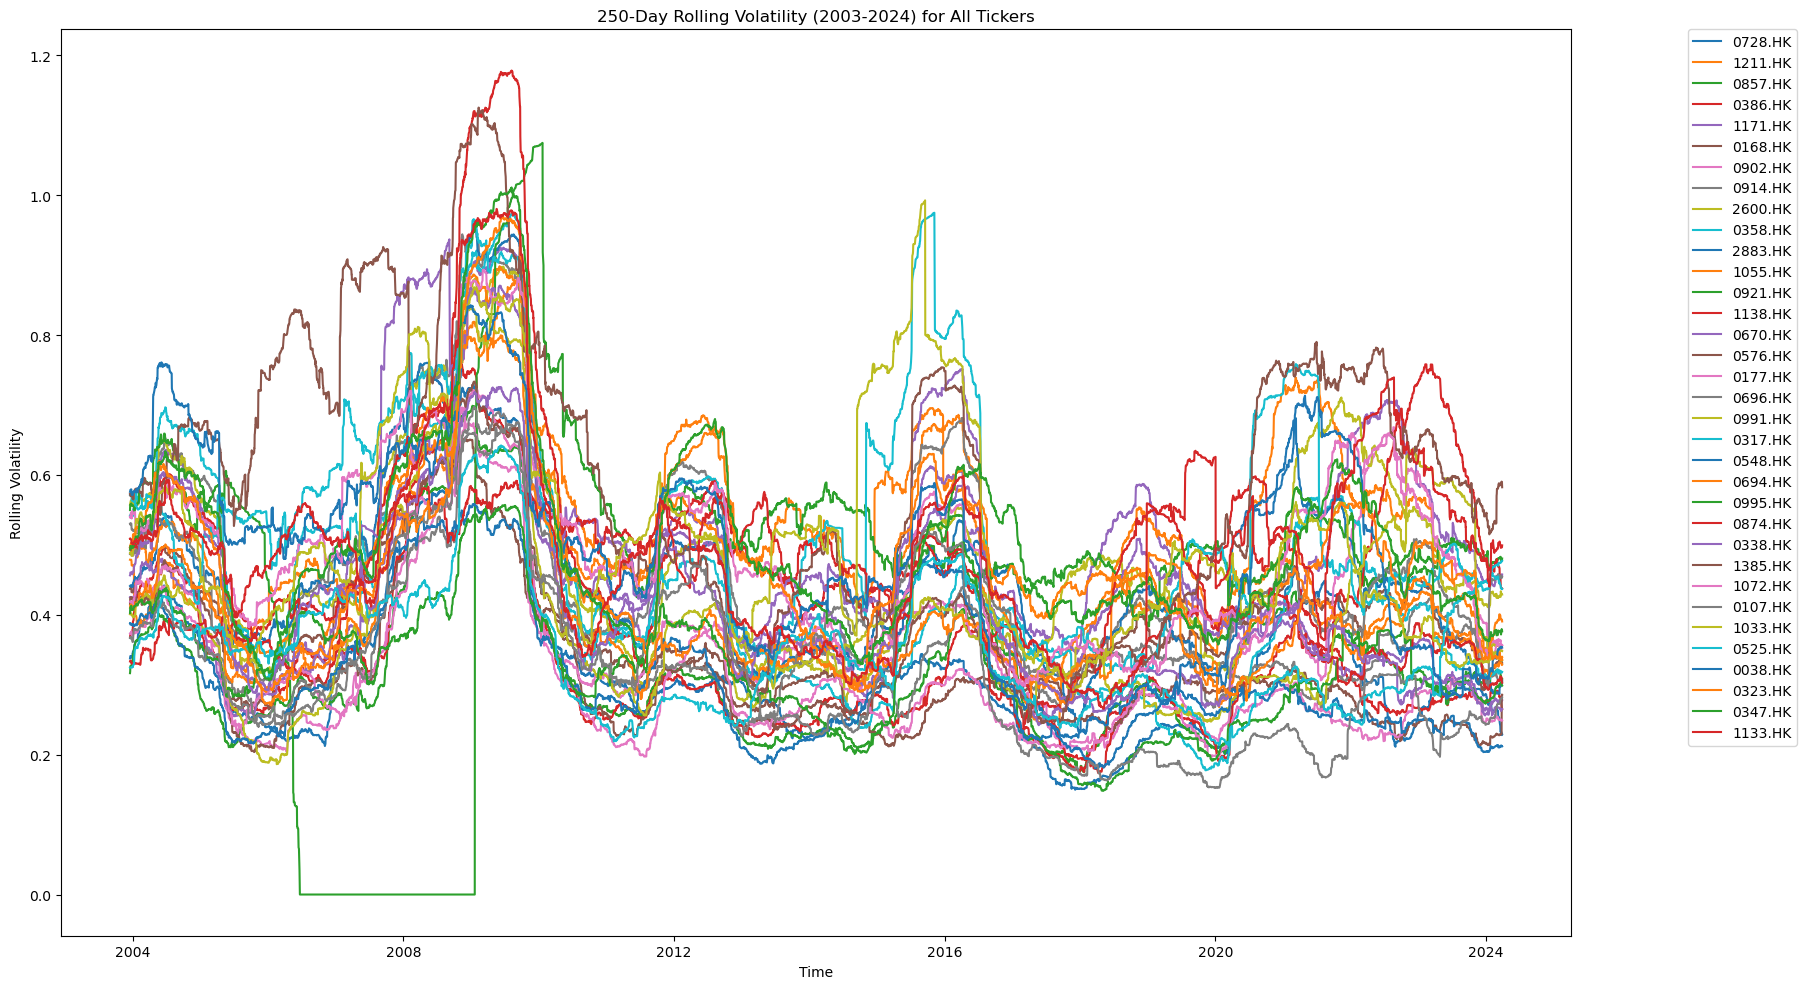

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

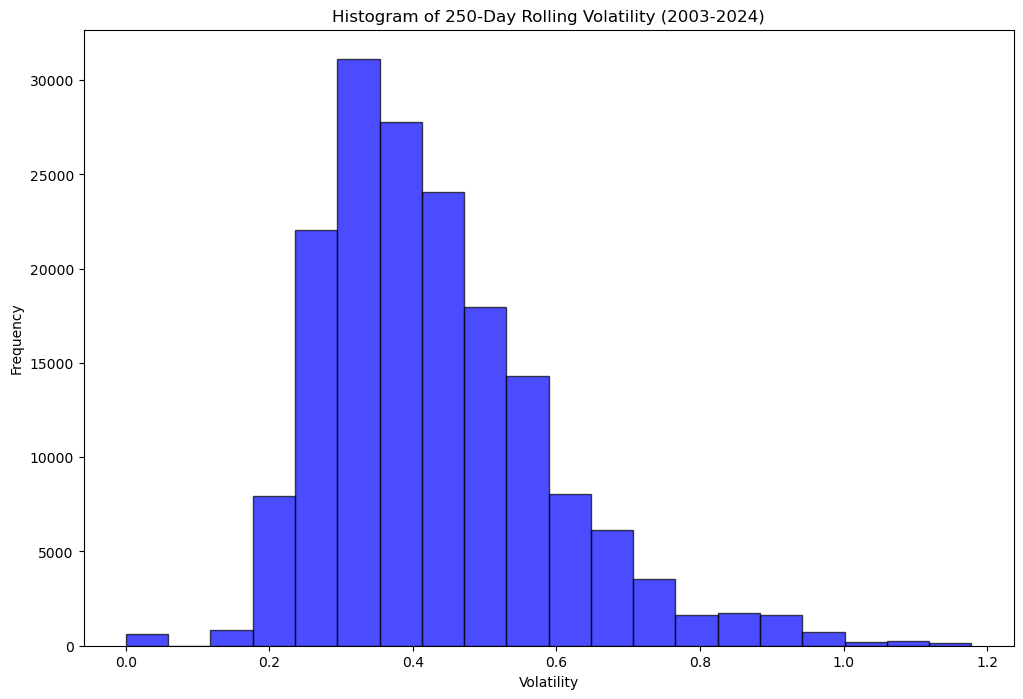

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = "2003-01-01"
end_date = "2024-03-31"
rolling_window = 250

#Plotting the rolling voaltility and historgram to check the volatility distribution for the 34 tickers
plt.figure(figsize=(18, 10))

# Loop through the tickers to calculate rolling volatility and plot
for i, symbol in enumerate(tickers):
    try:
        # Data sourcing
        data = yf.download(symbol, start=start_date, end=end_date)

        if data.empty:
            raise ValueError(f"No data available for {symbol} from {start_date}")

        #Log return
        data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))

        # 250-day annualised rolling volatility
        data['Rolling_Volatility'] = data['Log_Returns'].rolling(window=rolling_window).std() * np.sqrt(250)

        # Drop null values
        data = data.dropna()

        # Plotting of the rolling volatility over time
        plt.plot(data.index, data['Rolling_Volatility'], label=symbol)

    except Exception as e:
        print(f"Error with {symbol}: {e}")

# Plot
plt.title("250-Day Rolling Volatility (2003-2024) for All Tickers")
plt.xlabel("Time")
plt.ylabel("Rolling Volatility")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=1, borderaxespad=0.)
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(12, 8))
all_volatility = []

# Aggregate volatility data for histogram
for symbol in tickers:
    try:
        data = yf.download(symbol, start=start_date, end=end_date)

        if not data.empty:
            data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
            data['Rolling_Volatility'] = data['Log_Returns'].rolling(window=rolling_window).std() * np.sqrt(250)
            all_volatility.extend(data['Rolling_Volatility'].dropna().tolist())

    except Exception as e:
        print(f"Error with {symbol}: {e}")

plt.hist(all_volatility, bins=20, alpha=0.7, edgecolor='black', color='b')
plt.title("Histogram of 250-Day Rolling Volatility (2003-2024)")
plt.xlabel("Volatility")
plt.ylabel("Frequency")
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

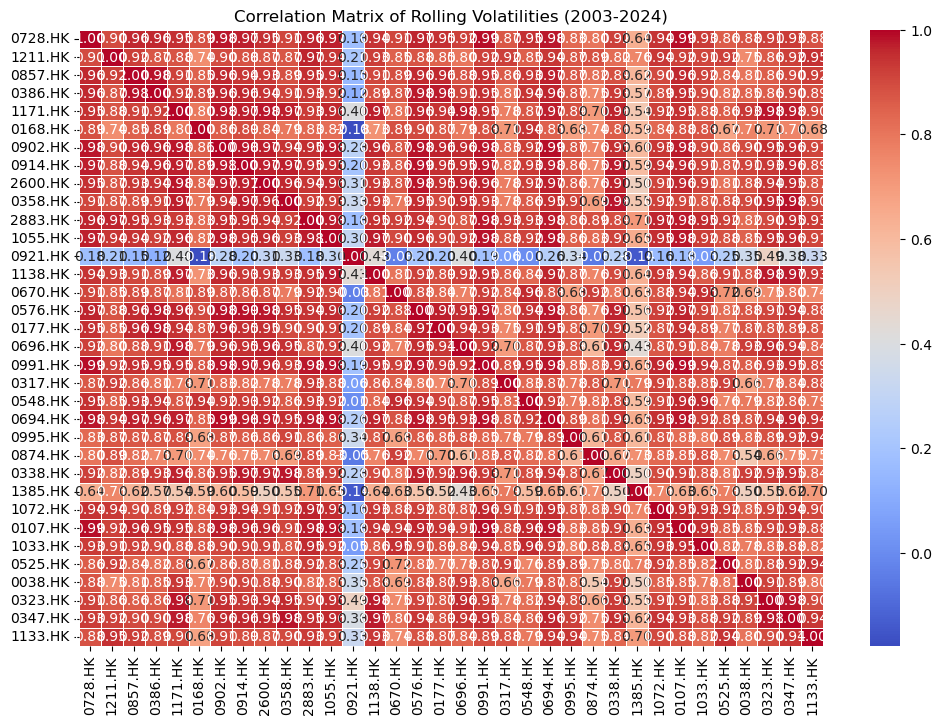

In [5]:
#Check the correlation among the selected tickers
import seaborn as sns
start_date = "2003-01-01"
end_date = "2009-12-31"

# Rolling window for 250-day for volatility calculation
rolling_window = 250
volatility_df = pd.DataFrame()

# Calculate rolling volatilities for each ticker
for symbol in tickers:
    try:

        data = yf.download(symbol, start=start_date, end=end_date)
        if data.empty:
            raise ValueError(f"No data available for {symbol} from {start_date}")
        #Log return
        data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))

        # Annualised volatility
        data['Rolling_Volatility'] = data['Log_Returns'].rolling(window=rolling_window).std() * np.sqrt(250)

        # Drop Nan
        volatility_df[symbol] = data['Rolling_Volatility'].dropna()

    except Exception as e:
        print(f"Error with {symbol}: {e}")

# Correlation matrix for the rolling volatilities
correlation_matrix = volatility_df.corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Rolling Volatilities (2003-2024)")
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


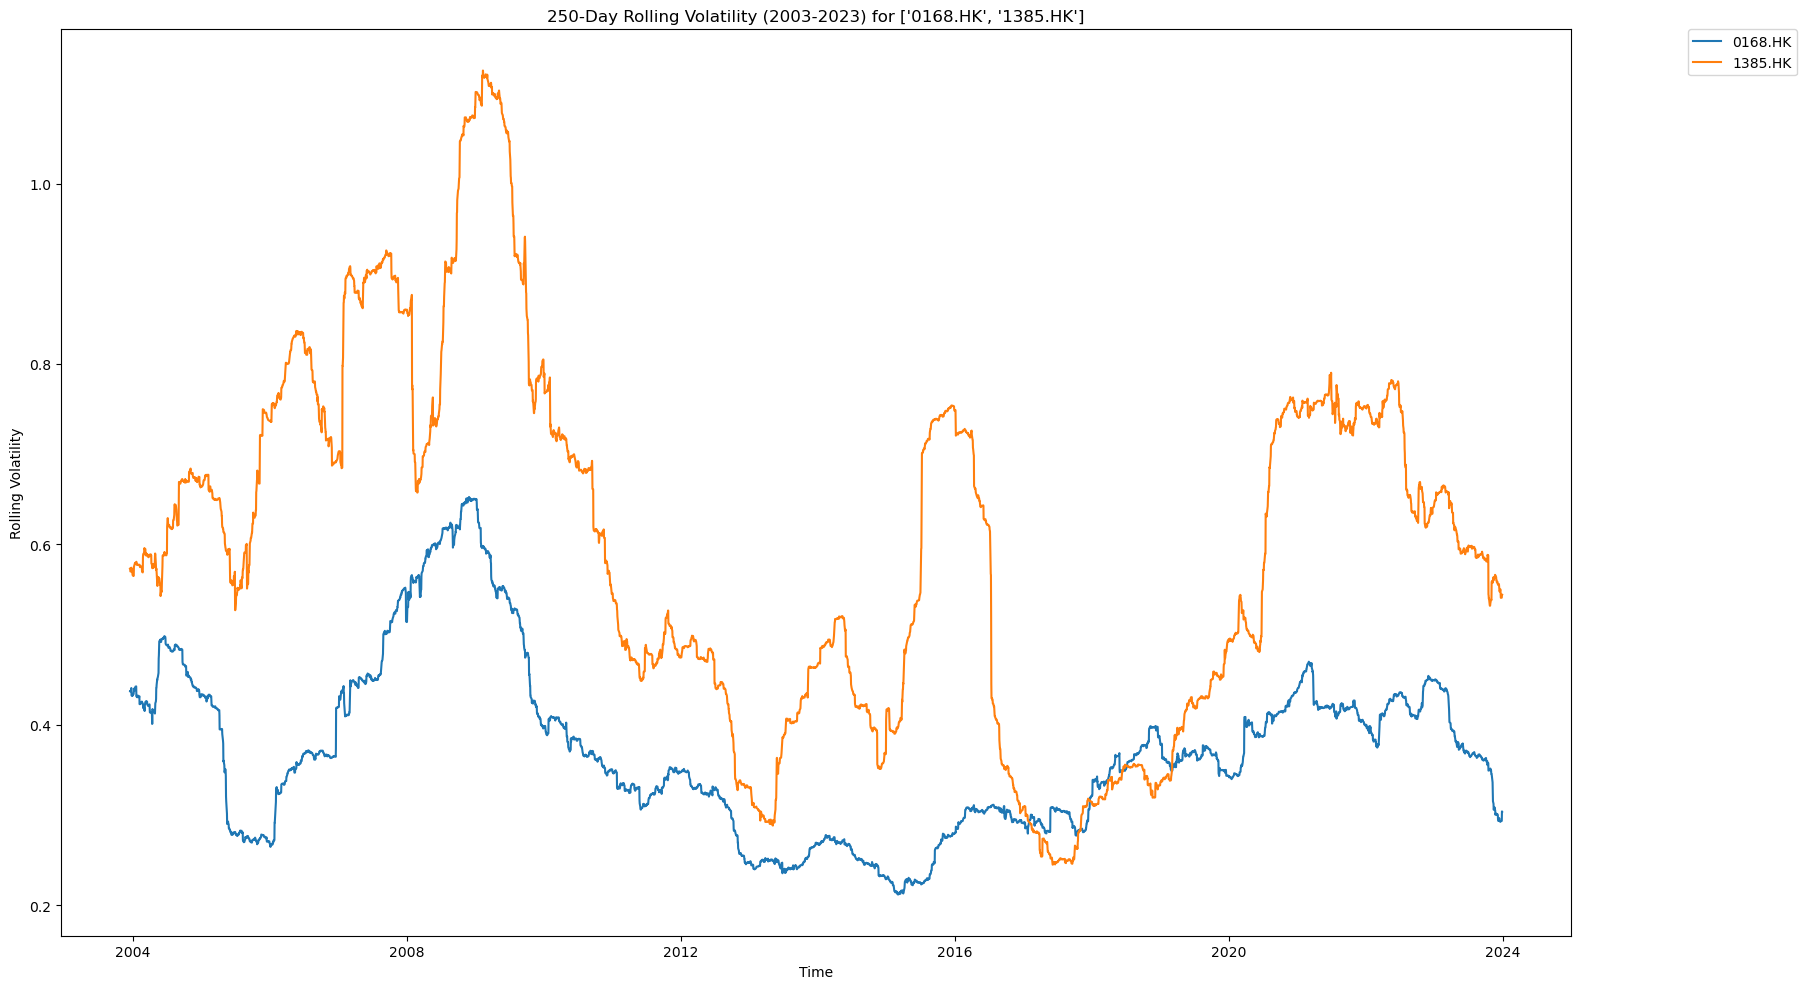

In [6]:
#pick 2 tickers with correlation around 50% correlation to check the divergence in volatility
tickers = ["0168.HK","1385.HK"]

# Considering the date range of 6 years
start_date = "2003-01-01"
end_date = "2023-12-31"

# Rolling window for volatility computation
rolling_window = 250

plt.figure(figsize=(18, 10))
for i, symbol in enumerate(tickers):
    try:
        data = yf.download(symbol, start=start_date, end=end_date)

        if data.empty:
            raise ValueError(f"No data available for {symbol} from {start_date}")
        data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
        data['Rolling_Volatility'] = data['Log_Returns'].rolling(window=rolling_window).std() * np.sqrt(250)
        data = data.dropna()
        plt.plot(data.index, data['Rolling_Volatility'], label=symbol)

    except Exception as e:
        print(f"Error with {symbol}: {e}")
plt.title(f"250-Day Rolling Volatility (2003-2023) for {tickers}")
plt.xlabel("Time")
plt.ylabel("Rolling Volatility")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=1, borderaxespad=0.)
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


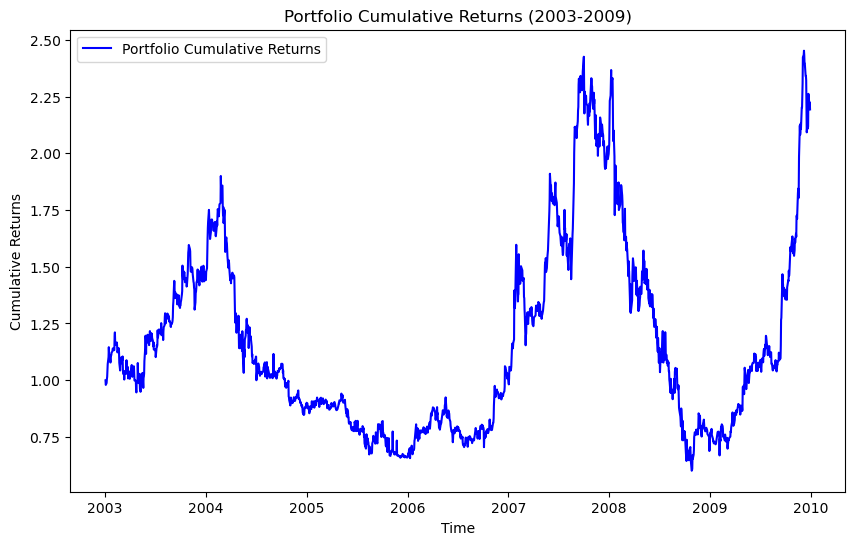

In [7]:
# Now  considering the 2 tickers for the portfolio creation with starting weight of 50%
ticker1 = "0168.HK"
ticker2 = "1385.HK"
start_date = "2003-01-01"
end_date = "2009-12-31"
data1 = yf.download(ticker1, start=start_date, end=end_date)
data2 = yf.download(ticker2, start=start_date, end=end_date)
if data1.empty or data2.empty:
    raise ValueError("Data retrieval error. One or both tickers have no data.")
data1['Log_Returns'] = np.log(data1['Close'] / data1['Close'].shift(1))
data2['Log_Returns'] = np.log(data2['Close'] / data2['Close'].shift(1))

returns_df = pd.DataFrame({
    ticker1: data1['Log_Returns'].dropna(),
    ticker2: data2['Log_Returns'].dropna(),
})

# Initial portoflio weight
weights = np.array([0.5, 0.5])

# Portfolio returns
portfolio_returns = returns_df.dot(weights)

# Cumulative portfolio return
cumulative_returns = (1 + portfolio_returns).cumprod()

# Cumulative returns to observe portfolio performance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label='Portfolio Cumulative Returns', color='b')
plt.title("Portfolio Cumulative Returns (2003-2009)")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

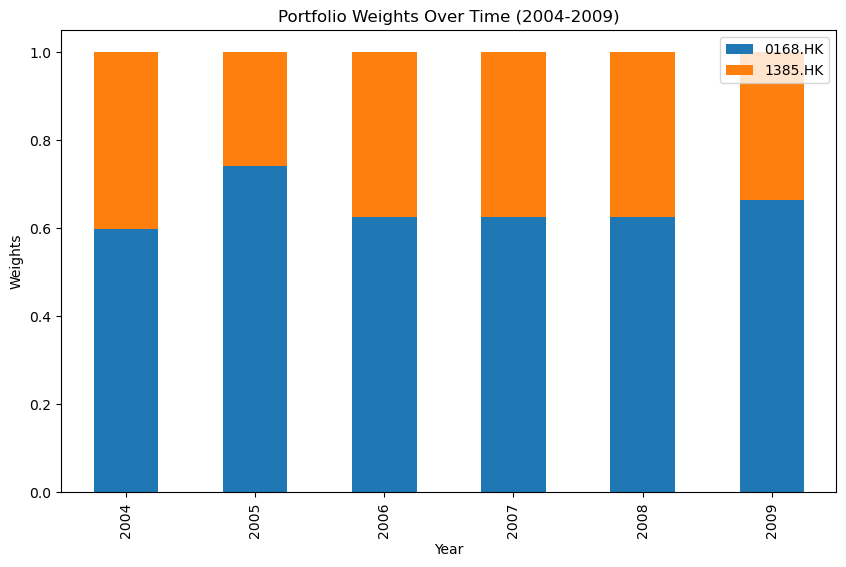

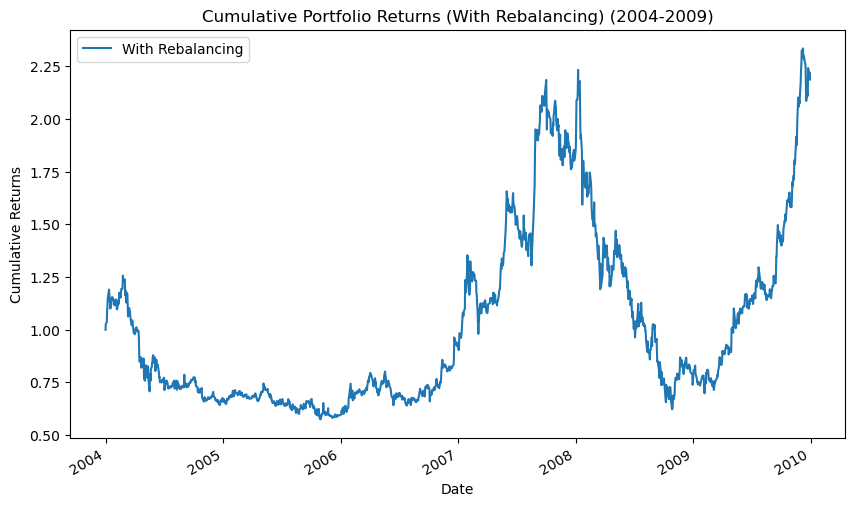

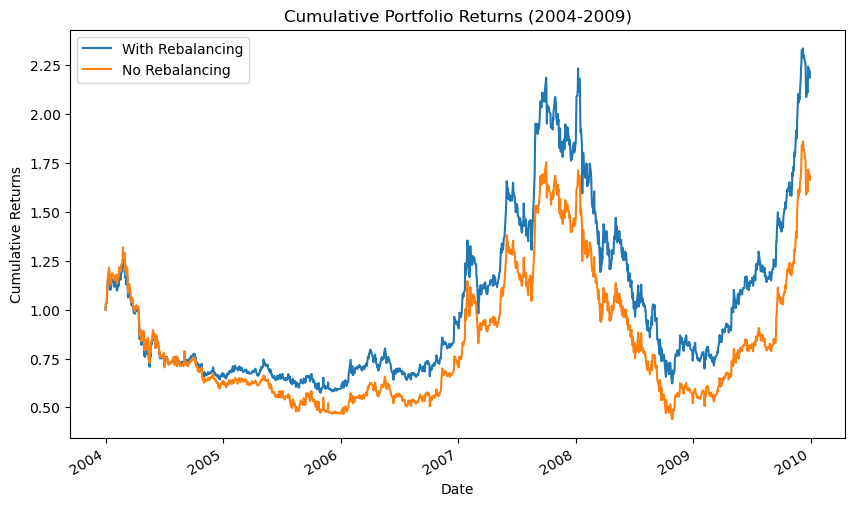

In [11]:
#Rebalance the weights at year end to maintain the same volatility

# Calculate annualized volatility
def calculate_annualized_volatility(returns):
    daily_volatility = returns.std()
    annualized_volatility = daily_volatility * np.sqrt(252)
    return annualized_volatility

tickers = ["0168.HK", "1385.HK"]
start_date = "2003-01-01"
end_date = "2009-12-31"

data = yf.download(tickers, start=start_date, end=end_date, progress=False)
adj_close = data['Adj Close']
daily_returns = np.log(adj_close / adj_close.shift(1)).dropna()
portfolio_weights = np.array([0.5, 0.5])  # Equal weights to start with
initial_returns = daily_returns.loc['2003-01-01':'2003-12-31']

# Portfolio returns with equal weights
portfolio_initial = (initial_returns * portfolio_weights).sum(axis=1)
initial_volatility = calculate_annualized_volatility(portfolio_initial)

# Rebalance the Portfolio to maintain constant volatility
portfolio_volatility = []
portfolio_returns = []
portfolio_weights_over_time = []


for year in range(2004, 2010):
    yearly_returns = daily_returns.loc[f'{year}-01-01':f'{year}-12-31']
    yearly_annualized_volatility = calculate_annualized_volatility(yearly_returns)

    # Calculate the optimal weights to maintain constant volatility
    if yearly_annualized_volatility.sum() == 0:
        new_weights = portfolio_weights
    else:
        new_weights = (initial_volatility / yearly_annualized_volatility) * (portfolio_weights.sum())

    # Normalize weights to sum to 100%
    new_weights = new_weights / new_weights.sum()
    portfolio_weights_over_time.append(new_weights)

    # Portfolio returns for the year
    portfolio_return = (yearly_returns * new_weights).sum(axis=1)
    portfolio_returns.append(portfolio_return)

    # Portfolio volatility for the year
    portfolio_volatility.append(calculate_annualized_volatility(portfolio_return))


portfolio_returns_df = pd.concat(portfolio_returns)

# Plot the weights over time
weights_df = pd.DataFrame(portfolio_weights_over_time, index=range(2004, 2010), columns=tickers)

weights_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Portfolio Weights Over Time (2004-2009)")
plt.xlabel("Year")
plt.ylabel("Weights")
plt.show()

# Plot the cumulative portfolio returns
cumulative_portfolio_returns = (1 + portfolio_returns_df).cumprod()

cumulative_portfolio_returns.plot(figsize=(10, 6), label='With Rebalancing')
plt.title("Cumulative Portfolio Returns (With Rebalancing) (2004-2009)")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Cumulative returns without rebalancing
portfolio_no_rebalance = (daily_returns.loc['2004-01-01':'2009-12-31'] * portfolio_weights).sum(axis=1)
cumulative_no_rebalance = (1 + portfolio_no_rebalance).cumprod()

# Plot both without and with rebalancing
cumulative_portfolio_returns.plot(figsize=(10, 6), label='With Rebalancing')
cumulative_no_rebalance.plot(label='No Rebalancing')
plt.title("Cumulative Portfolio Returns (2004-2009)")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()


In [13]:
#Checking of the best fit GARCH model for the stock universe to select a model for furthur use
#Code is using univariate data , future work may explore multivariate data to increase the model efficieny
import yfinance as yf
import numpy as np
import pandas as pd
from arch import arch_model

# List of stock tickers
tickers = [
    "0728.HK", "1211.HK", "0857.HK", "0386.HK", "1171.HK", "0168.HK",
    "0902.HK", "0914.HK", "2600.HK", "0358.HK", "2883.HK", "1055.HK",
    "0921.HK", "1138.HK", "0670.HK", "0576.HK", "0177.HK", "0696.HK",
    "0991.HK", "0317.HK", "0548.HK", "0694.HK", "0995.HK", "0874.HK",
    "0338.HK", "1385.HK", "1072.HK", "0107.HK", "1033.HK",
    "0525.HK", "0038.HK", "0323.HK", "0347.HK", "1133.HK"
]

start_date = "2003-01-01"
end_date = "2024-04-01"

# Store the count of best fit models
model_counts = {
    'GARCH(1,1)': 0,
    'EGARCH(1,1)': 0,
    'APARCH(1,1)': 0,
}


for ticker in tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        adj_close = data["Adj Close"]

        returns = np.log(adj_close / adj_close.shift(1)).dropna() * np.sqrt(252)

        # Fit different GARCH models namelt GARCH, EGARCH and APARCH
        models = {
            'GARCH(1,1)': arch_model(returns, vol='Garch', p=1, q=1),
            'EGARCH(1,1)': arch_model(returns, vol='EGarch', p=1, q=1),
            'APARCH(1,1)': arch_model(returns, vol='APARCH', p=1, q=1),
        }

        # Fit models and store AIC, BIC and likelifood
        results = {}
        for name, model in models.items():
            fit = model.fit(disp='off')
            results[name] = {
                'fit': fit,
                'AIC': fit.aic,
                'BIC': fit.bic,
            }

        # Best model by AIC
        best_model = min(results, key=lambda x: results[x]['AIC'])
        model_counts[best_model] += 1

    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Display the count of best models
print("Best Model Counts:")
for model, count in model_counts.items():
    print(f"{model}: {count}")


Best Model Counts:
GARCH(1,1): 12
EGARCH(1,1): 2
APARCH(1,1): 20


Iteration:      1,   Func. Count:      7,   Neg. LLF: 39181.51415943285
Iteration:      2,   Func. Count:     18,   Neg. LLF: 35093.49007304547
Iteration:      3,   Func. Count:     29,   Neg. LLF: 5059.354545116757
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4469.547142231726
Iteration:      5,   Func. Count:     45,   Neg. LLF: 4700.259549824192
Iteration:      6,   Func. Count:     52,   Neg. LLF: 4416.306350563893
Iteration:      7,   Func. Count:     58,   Neg. LLF: 4420.716633004773
Iteration:      8,   Func. Count:     65,   Neg. LLF: 4416.0621015918905
Iteration:      9,   Func. Count:     71,   Neg. LLF: 4416.013127764332
Iteration:     10,   Func. Count:     77,   Neg. LLF: 4416.013090399858
Iteration:     11,   Func. Count:     82,   Neg. LLF: 4416.013090399489
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4416.013090399858
            Iterations: 11
            Function evaluations: 82
            Gradient evaluations: 1

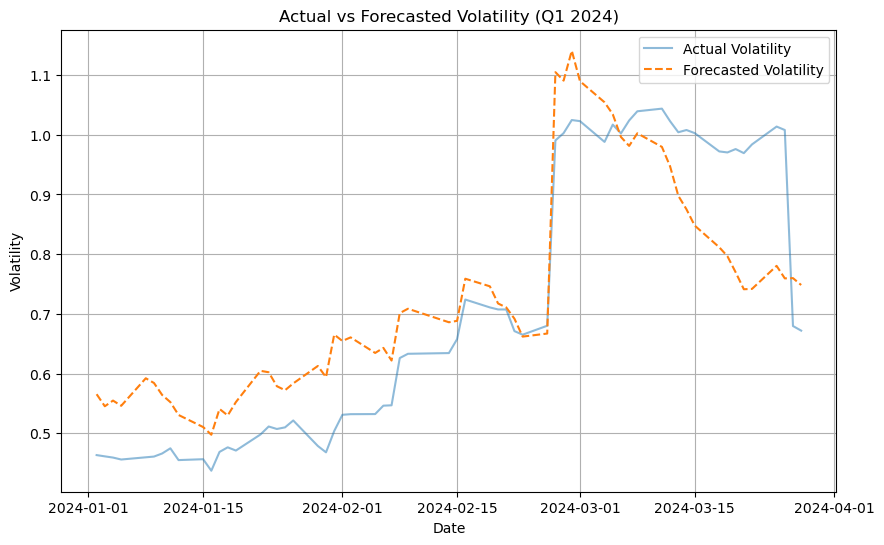

Actual vs Forecasted Volatility (Q1 2024):
            Actual Volatility  Forecasted Volatility
Date                                                
2024-01-02           0.463473               0.565466
2024-01-03           0.461363               0.545278
2024-01-04           0.459339               0.554790
2024-01-05           0.456072               0.546061
2024-01-08           0.459777               0.592141
...                       ...                    ...
2024-03-22           0.983851               0.741836
2024-03-25           1.013692               0.780408
2024-03-26           1.007949               0.759444
2024-03-27           0.679652               0.759827
2024-03-28           0.671919               0.748336

[61 rows x 2 columns]


In [14]:
# Now APARCH came as the best fit model for most of the cases
#Volatility forecasting for tickers to check the performance
ticker = "1385.HK"
start_date = "2003-01-01"
end_date = "2024-04-01"

data = yf.download(ticker, start=start_date, end=end_date, progress=False)
adj_close = data["Adj Close"]

# Calculate annualised daily returns
returns = np.log(adj_close / adj_close.shift(1)).dropna() * np.sqrt(252)

if isinstance(returns, pd.DataFrame):
    returns = returns.iloc[:, 0]
elif isinstance(returns, pd.Series):
    returns = returns.squeeze()

#Model Fit
model = arch_model(returns, vol="APARCH", p=1, q=1)
results = model.fit()

# Forecast for 13 weeks ahead starting from "2024-01-01"
forecast = results.forecast(start="2024-01-01", horizon=13, method="simulation")
forecast_volatility = forecast.variance.dropna().mean(axis=1) ** 0.5
window_size = 21
actual_volatility = returns.rolling(window_size).std()  # Rolling standard deviation

# Extract actual and forecasted volatilities for Q1 2024
forecast_volatility_q1 = forecast_volatility.loc["2024-01-01":"2024-04-01"]
actual_volatility_q1 = actual_volatility.loc["2024-01-01":"2024-04-01"]

volatility_table = pd.DataFrame({
    "Date": forecast_volatility_q1.index,
    "Actual Volatility": actual_volatility_q1.values,
    "Forecasted Volatility": forecast_volatility_q1.values,
})

volatility_table.set_index("Date", inplace=True)

# Plot actual vs forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility_table.index, volatility_table["Actual Volatility"], label="Actual Volatility", alpha=0.5)
plt.plot(volatility_table.index, volatility_table["Forecasted Volatility"], label="Forecasted Volatility", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Actual vs Forecasted Volatility (Q1 2024)")
plt.legend()
plt.grid(True)
plt.show()

print("Actual vs Forecasted Volatility (Q1 2024):")
print(volatility_table)
volatility_table.to_csv("actual_vs_forecasted_volatility_q1_2024_1385HK.csv", index=True)  # Index will include dates


Iteration:      1,   Func. Count:      7,   Neg. LLF: 30378.36023820525
Iteration:      2,   Func. Count:     18,   Neg. LLF: 31006.404201042784
Iteration:      3,   Func. Count:     29,   Neg. LLF: 2662.6826401797
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2191.6486920112357
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2583.0813291815793
Iteration:      6,   Func. Count:     52,   Neg. LLF: 2182.0035003027806
Iteration:      7,   Func. Count:     59,   Neg. LLF: 2365.5668634490858
Iteration:      8,   Func. Count:     66,   Neg. LLF: 2123.8220529186
Iteration:      9,   Func. Count:     73,   Neg. LLF: 2502.659734744649
Iteration:     10,   Func. Count:     80,   Neg. LLF: 2113.0129147646717
Iteration:     11,   Func. Count:     87,   Neg. LLF: 2112.5851485308967
Iteration:     12,   Func. Count:     93,   Neg. LLF: 2112.575651790994
Iteration:     13,   Func. Count:     99,   Neg. LLF: 2112.565679257913
Iteration:     14,   Func. Count:    105,   Neg. LLF: 2112.56

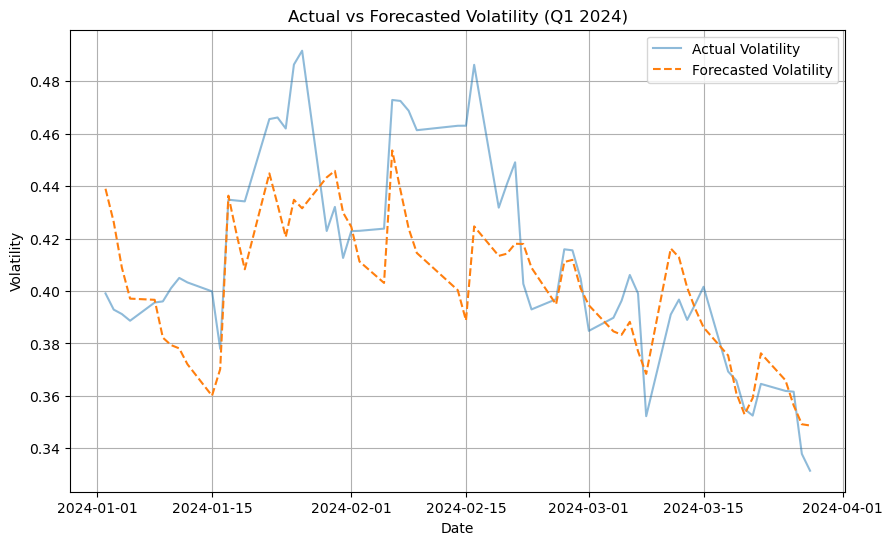

Actual vs Forecasted Volatility (Q1 2024):
            Actual Volatility  Forecasted Volatility
Date                                                
2024-01-02           0.399081               0.438994
2024-01-03           0.392913               0.426334
2024-01-04           0.391208               0.408892
2024-01-05           0.388667               0.397093
2024-01-08           0.395606               0.396648
...                       ...                    ...
2024-03-22           0.364586               0.376248
2024-03-25           0.361903               0.365962
2024-03-26           0.361595               0.356364
2024-03-27           0.337871               0.349193
2024-03-28           0.331470               0.348707

[61 rows x 2 columns]


In [12]:
# Now APARCH came as the best fit model for most of the cases
#Volatility forecasting for tickers to check the performance
ticker = "0168.HK"
start_date = "2003-01-01"
end_date = "2024-04-01"

data = yf.download(ticker, start=start_date, end=end_date, progress=False)
adj_close = data["Adj Close"]

# Calculate annualised daily returns
returns = np.log(adj_close / adj_close.shift(1)).dropna() * np.sqrt(252)

if isinstance(returns, pd.DataFrame):
    returns = returns.iloc[:, 0]
elif isinstance(returns, pd.Series):
    returns = returns.squeeze()

#Model Fit
model = arch_model(returns, vol="APARCH", p=1, q=1)
results = model.fit()

# Forecast for 13 weeks ahead starting from "2024-01-01"
forecast = results.forecast(start="2024-01-01", horizon=13, method="simulation")
forecast_volatility = forecast.variance.dropna().mean(axis=1) ** 0.5
window_size = 21
actual_volatility = returns.rolling(window_size).std()  # Rolling standard deviation

# Extract actual and forecasted volatilities for Q1 2024
forecast_volatility_q1 = forecast_volatility.loc["2024-01-01":"2024-04-01"]
actual_volatility_q1 = actual_volatility.loc["2024-01-01":"2024-04-01"]

volatility_table = pd.DataFrame({
    "Date": forecast_volatility_q1.index,
    "Actual Volatility": actual_volatility_q1.values,
    "Forecasted Volatility": forecast_volatility_q1.values,
})

volatility_table.set_index("Date", inplace=True)

# Plot actual vs forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility_table.index, volatility_table["Actual Volatility"], label="Actual Volatility", alpha=0.5)
plt.plot(volatility_table.index, volatility_table["Forecasted Volatility"], label="Forecasted Volatility", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Actual vs Forecasted Volatility (Q1 2024)")
plt.legend()
plt.grid(True)
plt.show()

print("Actual vs Forecasted Volatility (Q1 2024):")
print(volatility_table)
volatility_table.to_csv("actual_vs_forecasted_volatility_q1_2024_0168HK.csv", index=True)  # Index will include dates


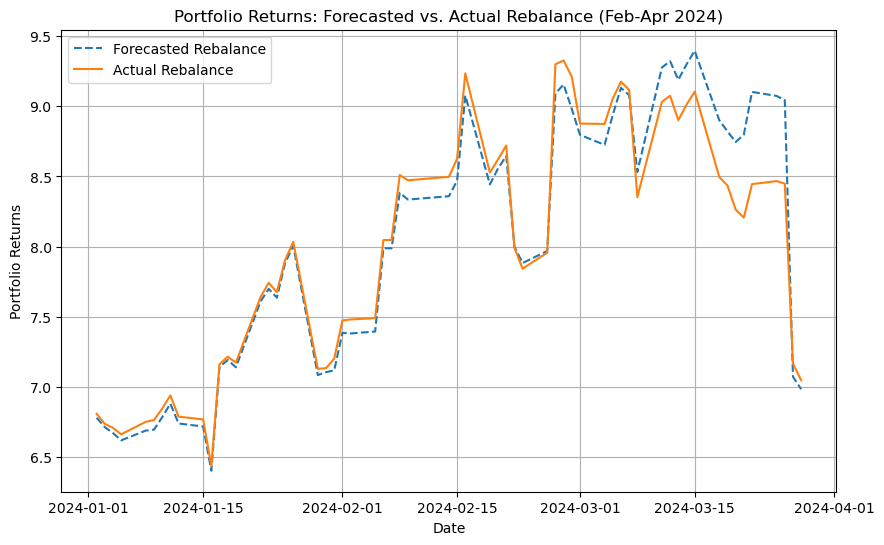

Forecasted Portfolio Weights:
{'0168.HK': Date
2024-01-02    0.564500
2024-01-03    0.562349
2024-01-04    0.573765
2024-01-05    0.580057
2024-01-08    0.598870
                ...   
2024-03-22    0.662764
2024-03-25    0.678243
2024-03-26    0.677930
2024-03-27    0.685089
2024-03-28    0.681431
Name: Forecasted Volatility, Length: 61, dtype: float64, '1385.HK': Date
2024-01-02    0.435500
2024-01-03    0.437651
2024-01-04    0.426235
2024-01-05    0.419943
2024-01-08    0.401130
                ...   
2024-03-22    0.337236
2024-03-25    0.321757
2024-03-26    0.322070
2024-03-27    0.314911
2024-03-28    0.318569
Name: Forecasted Volatility, Length: 61, dtype: float64}

Actual Portfolio Weights:
{'0168.HK': Date
2024-01-02    0.537326
2024-01-03    0.540063
2024-01-04    0.540051
2024-01-05    0.539897
2024-01-08    0.537510
                ...   
2024-03-22    0.729623
2024-03-25    0.736912
2024-03-26    0.735974
2024-03-27    0.667947
2024-03-28    0.669650
Name: Actual Volatil

In [16]:
# Read the CSV files containing actual and forecasted volatility for the two tickers
volatility_0168HK = pd.read_csv("actual_vs_forecasted_volatility_q1_2024_0168HK.csv", index_col='Date', parse_dates=True)
volatility_1385HK = pd.read_csv("actual_vs_forecasted_volatility_q1_2024_1385HK.csv", index_col='Date', parse_dates=True)

# Calculate portfolio volatility for January 2024 with equal weights
# Equal weights for two assets (0.5 each)
portfolio_volatility_jan = np.sqrt(
    (volatility_0168HK.loc["2024-01-01":"2024-01-31"]["Actual Volatility"] ** 2 * 0.5) +
    (volatility_1385HK.loc["2024-01-01":"2024-01-31"]["Actual Volatility"] ** 2 * 0.5)
).mean()

# Rebalance portfolio to maintain the volatility observed in January 2024
# Using forecasted volatility
forecasted_weights = {
    "0168.HK": portfolio_volatility_jan / volatility_0168HK["Forecasted Volatility"],
    "1385.HK": portfolio_volatility_jan / volatility_1385HK["Forecasted Volatility"],
}

# Normalize forecasted weights to ensure they sum to 100%
total_forecasted_weight = sum(forecasted_weights.values())
forecasted_weights = {k: v / total_forecasted_weight for k, v in forecasted_weights.items()}

# Rebalance portfolio using actual volatility
actual_weights = {
    "0168.HK": portfolio_volatility_jan / volatility_0168HK["Actual Volatility"],
    "1385.HK": portfolio_volatility_jan / volatility_1385HK["Actual Volatility"],
}

# Normalize actual weights to ensure they sum to 100%
total_actual_weight = sum(actual_weights.values())
actual_weights = {k: v / total_actual_weight for k, v in actual_weights.items()}

# Calculate the overall portfolio returns using forecasted and actual weights
# Simulate the portfolio returns
returns_0168HK = volatility_0168HK["Actual Volatility"] * np.sqrt(252)  # Example return estimation
returns_1385HK = volatility_1385HK["Actual Volatility"] * np.sqrt(252)

# Calculate portfolio returns with forecasted rebalance
portfolio_returns_forecasted = (
    returns_0168HK * forecasted_weights["0168.HK"] +
    returns_1385HK * forecasted_weights["1385.HK"]
)

# Calculate portfolio returns with actual rebalance
portfolio_returns_actual = (
    returns_0168HK * actual_weights["0168.HK"] +
    returns_1385HK * actual_weights["1385.HK"]
)

# Plot the portfolio returns for the three-month period
plt.figure(figsize=(10, 6))
plt.plot(portfolio_returns_forecasted.index, portfolio_returns_forecasted, label="Forecasted Rebalance", linestyle="--")
plt.plot(portfolio_returns_actual.index, portfolio_returns_actual, label="Actual Rebalance", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns: Forecasted vs. Actual Rebalance (Feb-Apr 2024)")
plt.legend()
plt.grid(True)
plt.show()

# Display the calculated weights and portfolio returns
print("Forecasted Portfolio Weights:")
print(forecasted_weights)

print("\nActual Portfolio Weights:")
print(actual_weights)

print("\nPortfolio Returns with Forecasted Rebalance:")
print(portfolio_returns_forecasted)

print("\nPortfolio Returns with Actual Rebalance:")
print(portfolio_returns_actual)


In [17]:
#Now calculating the portoflio performance for 17 pair to check the model performance
def calculate_returns(tickers, start_date="2003-01-01", end_date="2024-04-01"):
    results = []

    # Loop through all the tickers in pairs
    for i in range(0, len(tickers), 2):
        if i + 1 < len(tickers):
            ticker1 = tickers[i]
            ticker2 = tickers[i + 1]
            data1 = yf.download(ticker1, start=start_date, end=end_date, progress=False)
            data2 = yf.download(ticker2, start=start_date, end=end_date, progress=False)
            adj_close1 = data1["Adj Close"]
            adj_close2 = data2["Adj Close"]
            returns1 = np.log(adj_close1 / adj_close1.shift(1)).dropna() * np.sqrt(252)
            returns2 = np.log(adj_close2 / adj_close2.shift(1)).dropna() * np.sqrt(252)
            # Fit APARCH(1, 1) model to estimate forecasted volatility
            model1 = arch_model(returns1, vol="APARCH", p=1, q=1)
            model2 = arch_model(returns2, vol="APARCH", p=1, q=1)
            results1 = model1.fit()
            results2 = model2.fit()
            forecast1 = results1.forecast(start="2024-01-01", horizon=13, method="simulation")
            forecast2 = results2.forecast(start="2024-01-01", horizon=13, method="simulation")

            forecast_volatility1 = forecast1.variance.dropna().mean(axis=1) ** 0.5
            forecast_volatility2 = forecast2.variance.dropna().mean(axis=1) ** 0.5

            actual_volatility1 = returns1.rolling(21).std()  # 21-day rolling window
            actual_volatility2 = returns2.rolling(21).std()  # 21-day rolling window

            portfolio_volatility_jan = np.sqrt(
                (actual_volatility1.loc["2024-01-01":"2024-01-31"] ** 2 * 0.5).mean() +
                (actual_volatility2.loc["2024-01-01":"2024-01-31"] ** 2 * 0.5).mean()
            )
            forecasted_weights = {
                ticker1: portfolio_volatility_jan / forecast_volatility1,
                ticker2: portfolio_volatility_jan / forecast_volatility2,
            }

            total_forecasted_weight = sum(forecasted_weights.values())
            forecasted_weights = {k: v / total_forecasted_weight for k, v in forecasted_weights.items()}
            forecasted_returns = (
                returns1 * forecasted_weights[ticker1] +
                returns2 * forecasted_weights[ticker2]
            )
            equal_weights = {"0.5", "0.5"}
            unbalanced_returns = (
                returns1 * 0.5 + returns2 * 0.5
            )

            results.append({
                "Pair": f"{ticker1}, {ticker2}",
                "Forecasted Rebalancing Returns": forecasted_returns.mean(),
                "No Rebalancing Returns": unbalanced_returns.mean(),
            })
    return pd.DataFrame(results)


tickers = [
    "0728.HK", "1211.HK", "0857.HK", "0386.HK", "1171.HK", "0168.HK",
    "0902.HK", "0914.HK", "2600.HK", "0358.HK", "2883.HK", "1055.HK",
    "0921.HK", "1138.HK", "0670.HK", "0576.HK", "0177.HK", "0696.HK",
    "0991.HK", "0317.HK", "0548.HK", "0694.HK", "0995.HK", "0874.HK",
    "0338.HK", "1385.HK", "1072.HK", "0107.HK", "1033.HK",
    "0525.HK", "0038.HK", "0323.HK", "0347.HK", "1133.HK"
]

return_comparison_table = calculate_returns(tickers)

print("Return Comparison: Forecasted Rebalancing vs Actual Rebalancing")
print(return_comparison_table)


Iteration:      1,   Func. Count:      7,   Neg. LLF: 15646.213677438285
Iteration:      2,   Func. Count:     19,   Neg. LLF: 21693.511698247683
Iteration:      3,   Func. Count:     29,   Neg. LLF: 1761.381104492413
Iteration:      4,   Func. Count:     38,   Neg. LLF: 1111.962282037785
Iteration:      5,   Func. Count:     45,   Neg. LLF: 11388.176079790725
Iteration:      6,   Func. Count:     52,   Neg. LLF: 1070.8652894795985
Iteration:      7,   Func. Count:     59,   Neg. LLF: 1139.4842821102613
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1070.7899194164274
Iteration:      9,   Func. Count:     73,   Neg. LLF: 1070.2122959956519
Iteration:     10,   Func. Count:     79,   Neg. LLF: 1070.2063095574736
Iteration:     11,   Func. Count:     85,   Neg. LLF: 1070.2059563192308
Iteration:     12,   Func. Count:     91,   Neg. LLF: 1070.2059202719565
Iteration:     13,   Func. Count:     97,   Neg. LLF: 1070.205919614254
Optimization terminated successfully    (Exit mode 0)


##   LSTM model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

def prepare_data(data, window):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    X, y = [], []
    for i in range(window, len(scaled_data)):
        X.append(scaled_data[i-window:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

def calculate_returns(tickers, start_date="2003-01-01", end_date="2024-04-01", window=60, forecast_horizon=21):
    results = []

    for i in range(0, len(tickers), 2):
        if i + 1 < len(tickers):
            ticker1, ticker2 = tickers[i], tickers[i + 1]
            data1 = yf.download(ticker1, start=start_date, end=end_date, progress=False)["Adj Close"]
            data2 = yf.download(ticker2, start=start_date, end=end_date, progress=False)["Adj Close"]
            returns1 = np.log(data1 / data1.shift(1)).dropna() * np.sqrt(252)
            returns2 = np.log(data2 / data2.shift(1)).dropna() * np.sqrt(252)

            X1, y1, scaler1 = prepare_data(returns1.values, window)
            X2, y2, scaler2 = prepare_data(returns2.values, window)

            model1 = Sequential([
                LSTM(50, return_sequences=True, input_shape=(window, 1)),
                Dropout(0.2),
                LSTM(50),
                Dropout(0.2),
                Dense(1)
            ])
            model1.compile(optimizer='adam', loss='mean_squared_error')
            model1.fit(X1, y1, epochs=5, batch_size=32, verbose=0)

            model2 = Sequential([
                LSTM(50, return_sequences=True, input_shape=(window, 1)),
                Dropout(0.2),
                LSTM(50),
                Dropout(0.2),
                Dense(1)
            ])
            model2.compile(optimizer='adam', loss='mean_squared_error')
            model2.fit(X2, y2, epochs=5, batch_size=32, verbose=0)

            forecast1 = model1.predict(X1[-1].reshape(1, window, 1)).flatten()[0]
            forecast2 = model2.predict(X2[-1].reshape(1, window, 1)).flatten()[0]
            forecast_volatility1 = np.full(forecast_horizon, scaler1.inverse_transform([[forecast1]])[0][0])
            forecast_volatility2 = np.full(forecast_horizon, scaler2.inverse_transform([[forecast2]])[0][0])

            actual_volatility1 = returns1.rolling(21).std().dropna()
            actual_volatility2 = returns2.rolling(21).std().dropna()
            portfolio_volatility_jan = np.sqrt(
                (actual_volatility1.iloc[-forecast_horizon:] ** 2 * 0.5) +
                (actual_volatility2.iloc[-forecast_horizon:] ** 2 * 0.5)
            ).mean()

            forecasted_weights = {
                ticker1: portfolio_volatility_jan / forecast_volatility1.mean(),
                ticker2: portfolio_volatility_jan / forecast_volatility2.mean(),
            }

            total_forecasted_weight = sum(forecasted_weights.values())
            forecasted_weights = {k: v / total_forecasted_weight for k, v in forecasted_weights.items()}
            forecasted_returns = (
                returns1.iloc[-forecast_horizon:] * forecasted_weights[ticker1] +
                returns2.iloc[-forecast_horizon:] * forecasted_weights[ticker2]
            )

            unbalanced_returns = (
                returns1.iloc[-forecast_horizon:] * 0.5 +
                returns2.iloc[-forecast_horizon:] * 0.5
            )

            results.append({
                "Pair": f"{ticker1}, {ticker2}",
                "Forecasted Rebalancing Returns": forecasted_returns.mean(),
                "No Rebalancing Returns": unbalanced_returns.mean(),
            })

    return pd.DataFrame(results)

tickers = [
    "0728.HK", "1211.HK", "0857.HK", "0386.HK", "1171.HK", "0168.HK",
    "0902.HK", "0914.HK", "2600.HK", "0358.HK", "2883.HK", "1055.HK",
    "0921.HK", "1138.HK", "0670.HK", "0576.HK", "0177.HK", "0696.HK",
    "0991.HK", "0317.HK", "0548.HK", "0694.HK", "0995.HK", "0874.HK",
    "0338.HK", "1385.HK", "1072.HK", "0107.HK", "1033.HK",
    "0525.HK", "0038.HK", "0323.HK", "0347.HK", "1133.HK"
]


return_comparison_table = calculate_returns(tickers)
print("Return Comparison:")
print(return_comparison_table)


2024-05-16 06:15:56.032580: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 06:15:56.032652: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 06:15:59.617031: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-16 06:16:06.347617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 06:16:21.351471: W tensorflow/compiler/tf2

1/1 [==============================] - 0s 416ms/step
Return Comparison:
                Pair  Forecasted Rebalancing Returns  No Rebalancing Returns
0   0728.HK, 1211.HK                       -0.024026                0.008641
1   0857.HK, 0386.HK                        0.061918                0.037202
2   1171.HK, 0168.HK                        0.220608               -0.020310
3   0902.HK, 0914.HK                        0.124364               -0.001810
4   2600.HK, 0358.HK                        0.113879                0.133502
5   2883.HK, 1055.HK                       -1.203223                0.087758
6   0921.HK, 1138.HK                       -0.110468                0.041615
7   0670.HK, 0576.HK                       -0.049236               -0.069374
8   0177.HK, 0696.HK                       -0.000191                0.013451
9   0991.HK, 0317.HK                        0.028969                0.034445
10  0548.HK, 0694.HK                       -0.097420               -0.013959
11  

## Bidirectional LSTM Model

Enhancements Made:
Bidirectional LSTM: This architecture allows the model to learn from both past and future data points, providing a richer understanding of the sequence.
Increased Units and Layers: More LSTM units and additional layers help the model capture more complex patterns.
Increased Dropout: Higher dropout rates help prevent overfitting, especially with more complex models.
Extended Training: Increased the number of epochs to ensure the model has more iterations to learn from the data.

In [6]:
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
#from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import yfinance as yf

def prepare_data(data, window):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    X, y = [], []
    for i in range(window, len(scaled_data)):
        X.append(scaled_data[i-window:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

def calculate_returns(tickers, start_date="2003-01-01", end_date="2024-04-01", window=60, forecast_horizon=21):
    results = []

    for i in range(0, len(tickers), 2):
        if i + 1 < len(tickers):
            ticker1, ticker2 = tickers[i], tickers[i + 1]
            data1 = yf.download(ticker1, start=start_date, end=end_date, progress=False)["Adj Close"]
            data2 = yf.download(ticker2, start=start_date, end=end_date, progress=False)["Adj Close"]
            returns1 = np.log(data1 / data1.shift(1)).dropna() * np.sqrt(252)
            returns2 = np.log(data2 / data2.shift(1)).dropna() * np.sqrt(252)

            X1, y1, scaler1 = prepare_data(returns1.values, window)
            X2, y2, scaler2 = prepare_data(returns2.values, window)

            model1 = Sequential([
                Bidirectional(LSTM(100, return_sequences=True, input_shape=(window, 1))),
                Dropout(0.3),
                Bidirectional(LSTM(100, return_sequences=True)),
                Dropout(0.3),
                Bidirectional(LSTM(50)),
                Dropout(0.2),
                Dense(1)
            ])
            model1.compile(optimizer='adam', loss='mean_squared_error')
            model1.fit(X1, y1, epochs=10, batch_size=32, verbose=0)

            model2 = Sequential([
                Bidirectional(LSTM(100, return_sequences=True, input_shape=(window, 1))),
                Dropout(0.3),
                Bidirectional(LSTM(100, return_sequences=True)),
                Dropout(0.3),
                Bidirectional(LSTM(50)),
                Dropout(0.2),
                Dense(1)
            ])
            model2.compile(optimizer='adam', loss='mean_squared_error')
            model2.fit(X2, y2, epochs=10, batch_size=32, verbose=0)

            forecast1 = model1.predict(X1[-1].reshape(1, window, 1)).flatten()[0]
            forecast2 = model2.predict(X2[-1].reshape(1, window, 1)).flatten()[0]
            forecast_volatility1 = np.full(forecast_horizon, scaler1.inverse_transform([[forecast1]])[0][0])
            forecast_volatility2 = np.full(forecast_horizon, scaler2.inverse_transform([[forecast2]])[0][0])

            actual_volatility1 = returns1.rolling(21).std().dropna()
            actual_volatility2 = returns2.rolling(21).std().dropna()
            portfolio_volatility_jan = np.sqrt(
                (actual_volatility1.iloc[-forecast_horizon:] ** 2 * 0.5) +
                (actual_volatility2.iloc[-forecast_horizon:] ** 2 * 0.5)
            ).mean()

            forecasted_weights = {
                ticker1: portfolio_volatility_jan / forecast_volatility1.mean(),
                ticker2: portfolio_volatility_jan / forecast_volatility2.mean(),
            }

            total_forecasted_weight = sum(forecasted_weights.values())
            forecasted_weights = {k: v / total_forecasted_weight for k, v in forecasted_weights.items()}
            forecasted_returns = (
                returns1.iloc[-forecast_horizon:] * forecasted_weights[ticker1] +
                returns2.iloc[-forecast_horizon:] * forecasted_weights[ticker2]
            )

            unbalanced_returns = (
                returns1.iloc[-forecast_horizon:] * 0.5 +
                returns2.iloc[-forecast_horizon:] * 0.5
            )

            results.append({
                "Pair": f"{ticker1}, {ticker2}",
                "Forecasted Rebalancing Returns": forecasted_returns.mean(),
                "No Rebalancing Returns": unbalanced_returns.mean(),
            })

    return pd.DataFrame(results)

# Example usage
tickers = [
    "0728.HK", "1211.HK", "0857.HK", "0386.HK", "1171.HK", "0168.HK",
    "0902.HK", "0914.HK", "2600.HK", "0358.HK", "2883.HK", "1055.HK",
    "0921.HK", "1138.HK", "0670.HK", "0576.HK", "0177.HK", "0696.HK",
    "0991.HK", "0317.HK", "0548.HK", "0694.HK", "0995.HK", "0874.HK",
    "0338.HK", "1385.HK", "1072.HK", "0107.HK", "1033.HK",
    "0525.HK", "0038.HK", "0323.HK", "0347.HK", "1133.HK"
]

return_comparison_table = calculate_returns(tickers)
print("Return Comparison:")
print(return_comparison_table)


1/1 [==============================] - 1s 1s/step
Return Comparison:
                Pair  Forecasted Rebalancing Returns  No Rebalancing Returns
0   0728.HK, 1211.HK                       -0.015384                0.008641
1   0857.HK, 0386.HK                        0.023053                0.037202
2   1171.HK, 0168.HK                       -0.029520               -0.020310
3   0902.HK, 0914.HK                       -0.014192               -0.001810
4   2600.HK, 0358.HK                        0.181417                0.133502
5   2883.HK, 1055.HK                        0.451458                0.087758
6   0921.HK, 1138.HK                        0.057131                0.041615
7   0670.HK, 0576.HK                       -0.084243               -0.069374
8   0177.HK, 0696.HK                        0.025204                0.013451
9   0991.HK, 0317.HK                        0.008587                0.034445
10  0548.HK, 0694.HK                        0.001602               -0.013959
11  099

In [8]:
pip install graphviz pydot


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Improved  LSTM model with validation and early stopping 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import plot_model

def prepare_data(data, window):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    X, y = [], []
    for i in range(window, len(scaled_data)):
        X.append(scaled_data[i-window:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

def calculate_returns(tickers, start_date="2003-01-01", end_date="2024-04-01", window=60, forecast_horizon=21):
    results = []

    for i in range(0, len(tickers), 2):
        if i + 1 < len(tickers):
            ticker1, ticker2 = tickers[i], tickers[i + 1]
            data1 = yf.download(ticker1, start=start_date, end=end_date, progress=False)["Adj Close"]
            data2 = yf.download(ticker2, start=start_date, end=end_date, progress=False)["Adj Close"]
            returns1 = np.log(data1 / data1.shift(1)).dropna() * np.sqrt(252)
            returns2 = np.log(data2 / data2.shift(1)).dropna() * np.sqrt(252)

            X1, y1, scaler1 = prepare_data(returns1.values, window)
            X2, y2, scaler2 = prepare_data(returns2.values, window)

            model1 = Sequential([
                Bidirectional(LSTM(100, return_sequences=True, input_shape=(window, 1))),
                Dropout(0.3),
                Bidirectional(LSTM(100, return_sequences=True)),
                Dropout(0.3),
                Bidirectional(LSTM(50)),
                Dropout(0.2),
                Dense(1)
            ])
            model1.compile(optimizer='adam', loss='mean_squared_error')
            dummy_input = np.zeros((1, window, 1))
            model1.build(dummy_input.shape)
            plot_model(model1, to_file='model1.png', show_shapes=True, show_layer_names=True)
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            model1.fit(X1, y1, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

            model2 = Sequential([
                Bidirectional(LSTM(100, return_sequences=True, input_shape=(window, 1))),
                Dropout(0.3),
                Bidirectional(LSTM(100, return_sequences=True)),
                Dropout(0.3),
                Bidirectional(LSTM(50)),
                Dropout(0.2),
                Dense(1)
            ])
            model2.compile(optimizer='adam', loss='mean_squared_error')
            dummy_input = np.zeros((1, window, 1))
            model2.build(dummy_input.shape)
            plot_model(model2, to_file='model2.png', show_shapes=True, show_layer_names=True)
            model2.fit(X2, y2, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

            forecast1 = model1.predict(X1[-1].reshape(1, window, 1)).flatten()[0]
            forecast2 = model2.predict(X2[-1].reshape(1, window, 1)).flatten()[0]
            forecast_volatility1 = np.full(forecast_horizon, scaler1.inverse_transform([[forecast1]])[0][0])
            forecast_volatility2 = np.full(forecast_horizon, scaler2.inverse_transform([[forecast2]])[0][0])

            actual_volatility1 = returns1.rolling(21).std().dropna()
            actual_volatility2 = returns2.rolling(21).std().dropna()
            portfolio_volatility_jan = np.sqrt(
                (actual_volatility1.iloc[-forecast_horizon:] ** 2 * 0.5) +
                (actual_volatility2.iloc[-forecast_horizon:] ** 2 * 0.5)
            ).mean()

            forecasted_weights = {
                ticker1: portfolio_volatility_jan / forecast_volatility1.mean(),
                ticker2: portfolio_volatility_jan / forecast_volatility2.mean(),
            }

            total_forecasted_weight = sum(forecasted_weights.values())
            forecasted_weights = {k: v / total_forecasted_weight for k, v in forecasted_weights.items()}
            forecasted_returns = (
                returns1.iloc[-forecast_horizon:] * forecasted_weights[ticker1] +
                returns2.iloc[-forecast_horizon:] * forecasted_weights[ticker2]
            )

            unbalanced_returns = (
                returns1.iloc[-forecast_horizon:] * 0.5 +
                returns2.iloc[-forecast_horizon:] * 0.5
            )

            results.append({
                "Pair": f"{ticker1}, {ticker2}",
                "Forecasted Rebalancing Returns": forecasted_returns.mean(),
                "No Rebalancing Returns": unbalanced_returns.mean(),
            })

    return pd.DataFrame(results)


# Example usage
tickers = [
    "0728.HK", "1211.HK", "0857.HK", "0386.HK", "1171.HK", "0168.HK",
    "0902.HK", "0914.HK", "2600.HK", "0358.HK", "2883.HK", "1055.HK",
    "0921.HK", "1138.HK", "0670.HK", "0576.HK", "0177.HK", "0696.HK",
    "0991.HK", "0317.HK", "0548.HK", "0694.HK", "0995.HK", "0874.HK",
    "0338.HK", "1385.HK", "1072.HK", "0107.HK", "1033.HK",
    "0525.HK", "0038.HK", "0323.HK", "0347.HK", "1133.HK"
]

return_comparison_table = calculate_returns(tickers)
print("Return Comparison:")
print(return_comparison_table)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
1/1 [==============================] - 1s 1s/step
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
1/1 [==============================] - 1s 1s/step
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
1/1 [=

# Miscellaneous

[*********************100%%**********************]  2 of 2 completed


Epoch 1/100
148/148 - 3s - loss: 0.0079 - 3s/epoch - 22ms/step
Epoch 2/100
148/148 - 1s - loss: 0.0016 - 619ms/epoch - 4ms/step
Epoch 3/100
148/148 - 1s - loss: 0.0014 - 622ms/epoch - 4ms/step
Epoch 4/100
148/148 - 1s - loss: 0.0013 - 623ms/epoch - 4ms/step
Epoch 5/100
148/148 - 1s - loss: 0.0014 - 620ms/epoch - 4ms/step
Epoch 6/100
148/148 - 1s - loss: 0.0012 - 622ms/epoch - 4ms/step
Epoch 7/100
148/148 - 1s - loss: 0.0011 - 622ms/epoch - 4ms/step
Epoch 8/100
148/148 - 1s - loss: 0.0011 - 621ms/epoch - 4ms/step
Epoch 9/100
148/148 - 1s - loss: 0.0010 - 625ms/epoch - 4ms/step
Epoch 10/100
148/148 - 1s - loss: 9.6969e-04 - 622ms/epoch - 4ms/step
Epoch 11/100
148/148 - 1s - loss: 9.0263e-04 - 623ms/epoch - 4ms/step
Epoch 12/100
148/148 - 1s - loss: 8.9015e-04 - 623ms/epoch - 4ms/step
Epoch 13/100
148/148 - 1s - loss: 8.7608e-04 - 620ms/epoch - 4ms/step
Epoch 14/100
148/148 - 1s - loss: 7.6196e-04 - 622ms/epoch - 4ms/step
Epoch 15/100
148/148 - 1s - loss: 7.3847e-04 - 623ms/epoch - 4ms/st

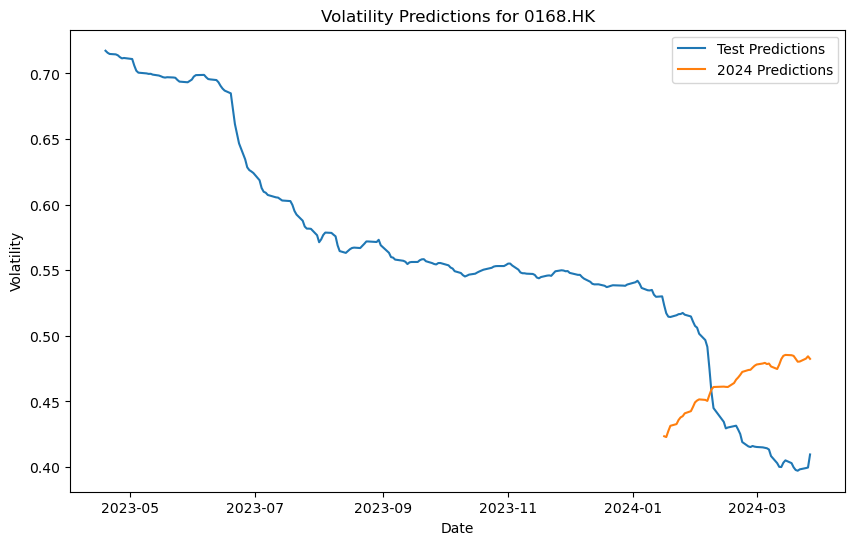

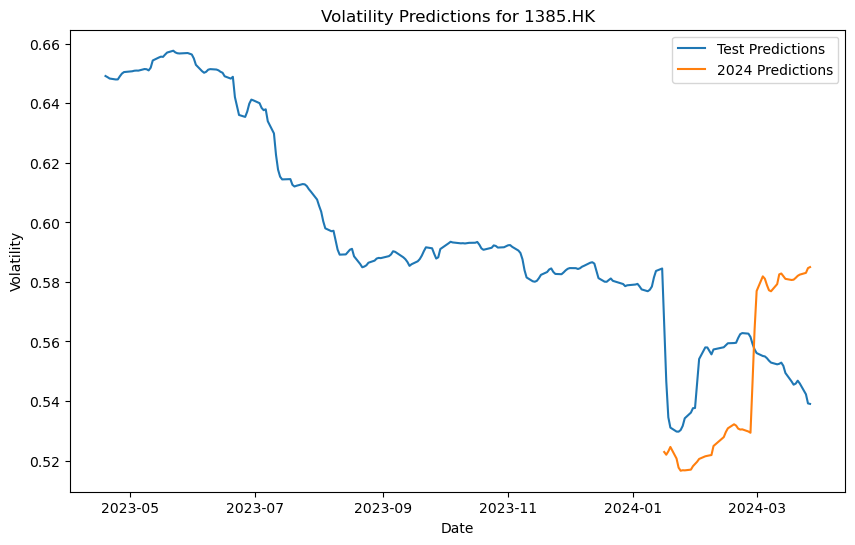

In [26]:
# importing the necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from math import sqrt
import matplotlib.pyplot as plt

#importing the data

tickers = ["0168.HK", "1385.HK"]
start_date = "2003-01-01"
end_date = "2024-03-28"

# Fetch historical data for the tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Prepare a clean DataFrame to avoid SettingWithCopyWarning
clean_data = pd.DataFrame(index=data.index)


# preprocessing the data

rolling_window = 250
for ticker in tickers:
    close_prices = data['Close'][ticker].dropna()
    log_returns = np.log(close_prices / close_prices.shift(1))
    volatility = log_returns.rolling(window=rolling_window).std() * sqrt(rolling_window)
    clean_data[f'Volatility_{ticker}'] = volatility

# Drop rows with NaN values that were introduced by rolling calculation
clean_data.dropna(inplace=True)

# Normalize the rolling volatility data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_volatility_data = {}
for ticker in tickers:
    scaled_volatility_data[ticker] = scaler.fit_transform(clean_data[f'Volatility_{ticker}'].values.reshape(-1, 1))
    
    
#preparing the data for the model

train_end = "2022-12-31"
test_start = "2023-01-01"
test_end = "2023-12-31"
predict_start = "2024-01-01"
predict_end = "2024-03-28"

# Split the data using the aligned indices
train_data = {ticker: scaled_volatility_data[ticker][clean_data.index <= train_end] for ticker in tickers}
test_data = {ticker: scaled_volatility_data[ticker][(clean_data.index >= test_start) & (clean_data.index <= test_end)] for ticker in tickers}
predict_data = {ticker: scaled_volatility_data[ticker][(clean_data.index >= predict_start) & (clean_data.index <= predict_end)] for ticker in tickers}




from tensorflow.keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True)




models = {}
look_back = 10

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

for ticker in tickers:
    X_train, Y_train = create_dataset(train_data[ticker], look_back)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2,callbacks=[tensorboard])
    models[ticker] = model

# Test and predict
test_predictions = {}
predict_predictions = {}
for ticker in tickers:
    X_test, _ = create_dataset(test_data[ticker], look_back)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    test_predictions[ticker] = models[ticker].predict(X_test)

    X_predict, _ = create_dataset(predict_data[ticker], look_back)
    X_predict = X_predict.reshape((X_predict.shape[0], X_predict.shape[1], 1))
    predict_predictions[ticker] = models[ticker].predict(X_predict)

    
    

    
for ticker in tickers:
    plt.figure(figsize=(10, 6))
    plt.plot(clean_data.index[-len(test_predictions[ticker]):], scaler.inverse_transform(test_predictions[ticker]), label='Test Predictions')
    plt.plot(clean_data.index[-len(predict_predictions[ticker]):], scaler.inverse_transform(predict_predictions[ticker]), label='2024 Predictions')
    plt.title(f'Volatility Predictions for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()



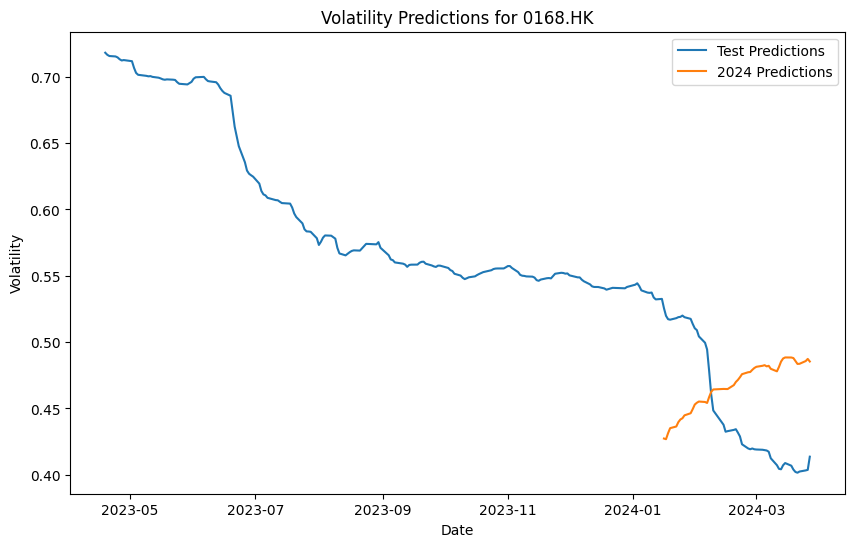

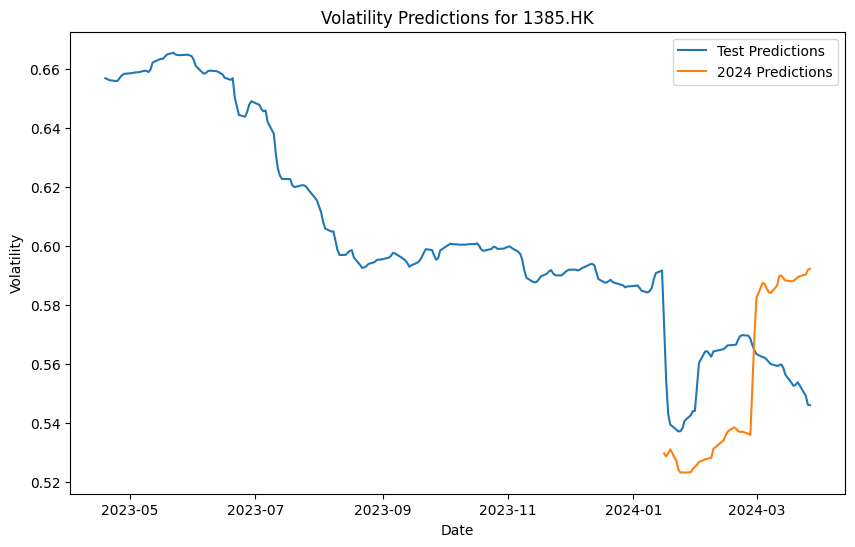

### Getting the model architecture

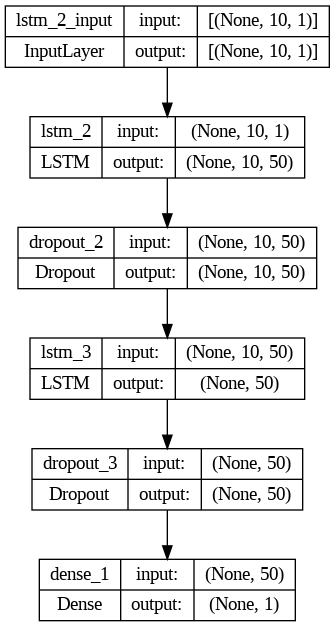

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

### Saving the model

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2024-05-16 12:42:54.757492: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 12:42:54.757575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 12:42:57.510883: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-16 12:43:02.358443: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 12:43:14.874962: W tensorflow/compiler/tf2

Epoch 1/100


2024-05-16 12:44:01.256312: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-05-16 12:44:08.819102: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd2a815bd90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-16 12:44:08.819133: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A10G, Compute Capability 8.6
2024-05-16 12:44:08.996866: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1715863449.287729   17132 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


148/148 - 21s - loss: 0.0050 - 21s/epoch - 140ms/step
Epoch 2/100
148/148 - 1s - loss: 9.7601e-04 - 1s/epoch - 7ms/step
Epoch 3/100
148/148 - 1s - loss: 8.8681e-04 - 1s/epoch - 7ms/step
Epoch 4/100
148/148 - 1s - loss: 8.2433e-04 - 994ms/epoch - 7ms/step
Epoch 5/100
148/148 - 1s - loss: 8.3167e-04 - 995ms/epoch - 7ms/step
Epoch 6/100
148/148 - 1s - loss: 8.8455e-04 - 1s/epoch - 7ms/step
Epoch 7/100
148/148 - 1s - loss: 7.0613e-04 - 995ms/epoch - 7ms/step
Epoch 8/100
148/148 - 1s - loss: 6.8010e-04 - 1s/epoch - 7ms/step
Epoch 9/100
148/148 - 1s - loss: 6.6440e-04 - 1s/epoch - 8ms/step
Epoch 10/100
148/148 - 1s - loss: 7.3975e-04 - 1s/epoch - 8ms/step
Epoch 11/100
148/148 - 1s - loss: 6.2450e-04 - 1s/epoch - 8ms/step
Epoch 12/100
148/148 - 1s - loss: 6.1569e-04 - 995ms/epoch - 7ms/step
Epoch 13/100
148/148 - 1s - loss: 6.2660e-04 - 996ms/epoch - 7ms/step
Epoch 14/100
148/148 - 1s - loss: 5.9101e-04 - 994ms/epoch - 7ms/step
Epoch 15/100
148/148 - 1s - loss: 5.0997e-04 - 995ms/epoch - 7ms/

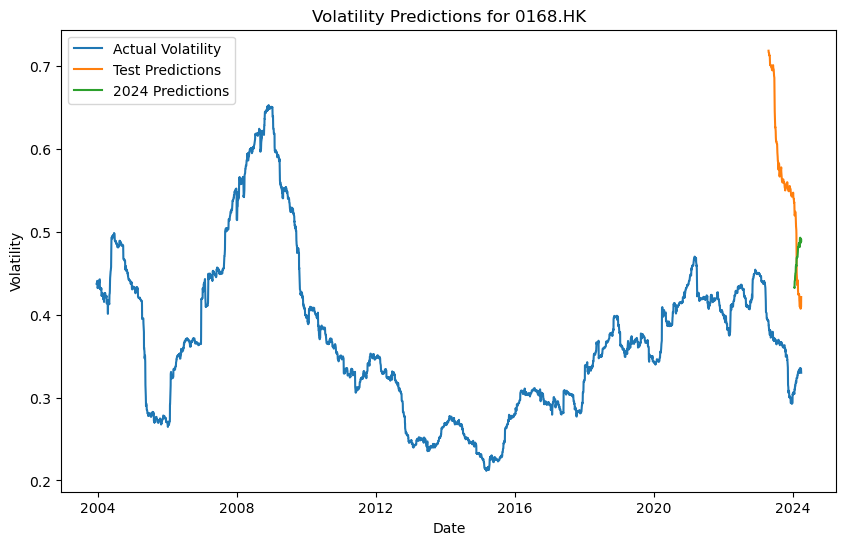

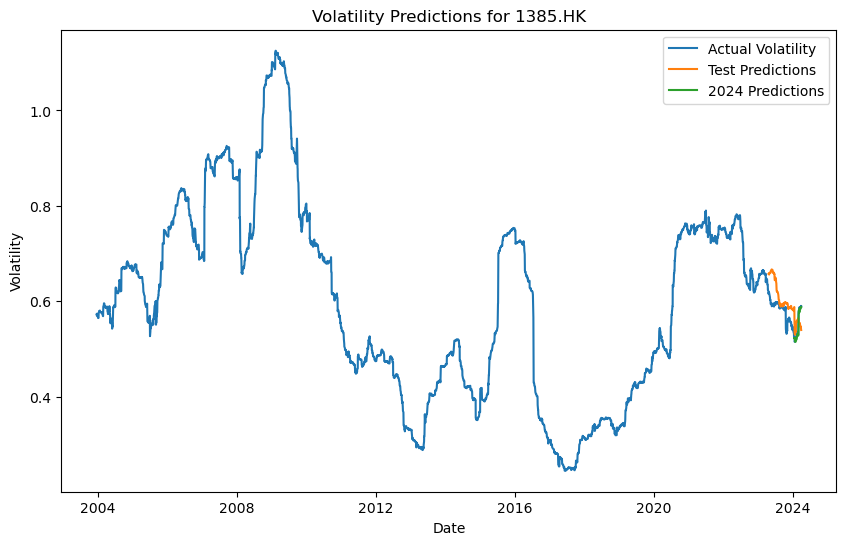

In [3]:
# importing the necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from math import sqrt
import matplotlib.pyplot as plt

# importing the data
tickers = ["0168.HK", "1385.HK"]
start_date = "2003-01-01"
end_date = "2024-03-28"

# Fetch historical data for the tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Prepare a clean DataFrame to avoid SettingWithCopyWarning
clean_data = pd.DataFrame(index=data.index)

# preprocessing the data
rolling_window = 250
for ticker in tickers:
    close_prices = data['Close'][ticker].dropna()
    log_returns = np.log(close_prices / close_prices.shift(1))
    volatility = log_returns.rolling(window=rolling_window).std() * sqrt(rolling_window)
    clean_data[f'Volatility_{ticker}'] = volatility

# Drop rows with NaN values that were introduced by rolling calculation
clean_data.dropna(inplace=True)

# Normalize the rolling volatility data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_volatility_data = {}
for ticker in tickers:
    scaled_volatility_data[ticker] = scaler.fit_transform(clean_data[f'Volatility_{ticker}'].values.reshape(-1, 1))

# preparing the data for the model
train_end = "2022-12-31"
test_start = "2023-01-01"
test_end = "2023-12-31"
predict_start = "2024-01-01"
predict_end = "2024-03-28"

# Split the data using the aligned indices
train_data = {ticker: scaled_volatility_data[ticker][clean_data.index <= train_end] for ticker in tickers}
test_data = {ticker: scaled_volatility_data[ticker][(clean_data.index >= test_start) & (clean_data.index <= test_end)] for ticker in tickers}
predict_data = {ticker: scaled_volatility_data[ticker][(clean_data.index >= predict_start) & (clean_data.index <= predict_end)] for ticker in tickers}

tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True)

models = {}
look_back = 10

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

for ticker in tickers:
    X_train, Y_train = create_dataset(train_data[ticker], look_back)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    model = Sequential([
        Bidirectional(LSTM(50, return_sequences=True, input_shape=(look_back, 1))),
        Dropout(0.2),
        Bidirectional(LSTM(50)),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2, callbacks=[tensorboard])
    models[ticker] = model

# Test and predict
test_predictions = {}
predict_predictions = {}
for ticker in tickers:
    X_test, _ = create_dataset(test_data[ticker], look_back)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    test_predictions[ticker] = models[ticker].predict(X_test)

    X_predict, _ = create_dataset(predict_data[ticker], look_back)
    X_predict = X_predict.reshape((X_predict.shape[0], X_predict.shape[1], 1))
    predict_predictions[ticker] = models[ticker].predict(X_predict)



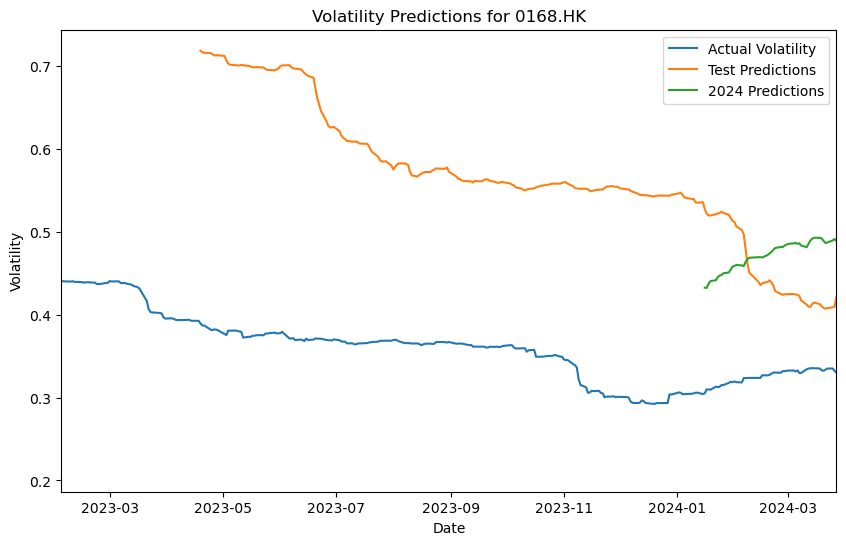

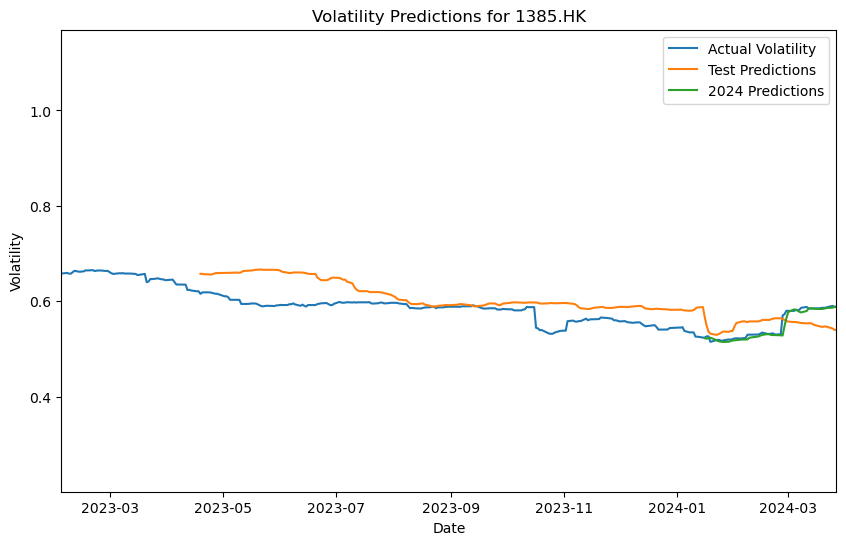

In [5]:
# Plot the actual, test, and predicted volatility
for ticker in tickers:
    plt.figure(figsize=(10, 6))
    plt.plot(clean_data.index, clean_data[f'Volatility_{ticker}'], label='Actual Volatility')
    plt.plot(clean_data.index[-len(test_predictions[ticker]):], scaler.inverse_transform(test_predictions[ticker]), label='Test Predictions')
    plt.plot(clean_data.index[-len(predict_predictions[ticker]):], scaler.inverse_transform(predict_predictions[ticker]), label='2024 Predictions')
    plt.title(f'Volatility Predictions for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()

    # Zoom in on the part where actual and predicted volatility are displayed
    start_date = clean_data.index[-len(test_predictions[ticker]) - len(predict_predictions[ticker])]
    end_date = clean_data.index[-1]
    plt.xlim(start_date, end_date)

    plt.show()

## Getting model architecture for improved LSTM model with valiation and early stopping.

[*********************100%%**********************]  2 of 2 completed

Epoch 1/50


118/118 - 11s - loss: 0.0047 - val_loss: 2.8124e-04 - 11s/epoch - 94ms/step
Epoch 2/50
118/118 - 1s - loss: 0.0012 - val_loss: 4.2985e-04 - 1s/epoch - 10ms/step
Epoch 3/50
118/118 - 1s - loss: 0.0012 - val_loss: 1.6540e-04 - 1s/epoch - 10ms/step
Epoch 4/50
118/118 - 1s - loss: 0.0010 - val_loss: 6.8280e-04 - 1s/epoch - 10ms/step
Epoch 5/50
118/118 - 1s - loss: 9.6406e-04 - val_loss: 1.7483e-04 - 1s/epoch - 10ms/step
Epoch 6/50
118/118 - 1s - loss: 9.5596e-04 - val_loss: 1.6458e-04 - 1s/epoch - 10ms/step
Epoch 7/50
118/118 - 1s - loss: 8.2406e-04 - val_loss: 1.7689e-04 - 1s/epoch - 10ms/step
Epoch 8/50
118/118 - 1s - loss: 8.1056e-04 - val_loss: 1.5667e-04 - 1s/epoch - 10ms/step
Epoch 9/50
118/118 - 1s - loss: 8.0665e-04 - val_loss: 1.3639e-04 - 1s/epoch - 10ms/step
Epoch 10/50
118/118 - 1s - loss: 9.4792e-04 - val_loss: 3.7425e-04 - 1s/epoch - 10ms/step
Epoch 11/50
118/118 - 1s - loss: 7.4649e-04 - val_loss: 2.0848e-04 - 1s/epoch - 10ms/step
Epoch 12/50
118/118 - 1s - loss: 7.8168e-04 

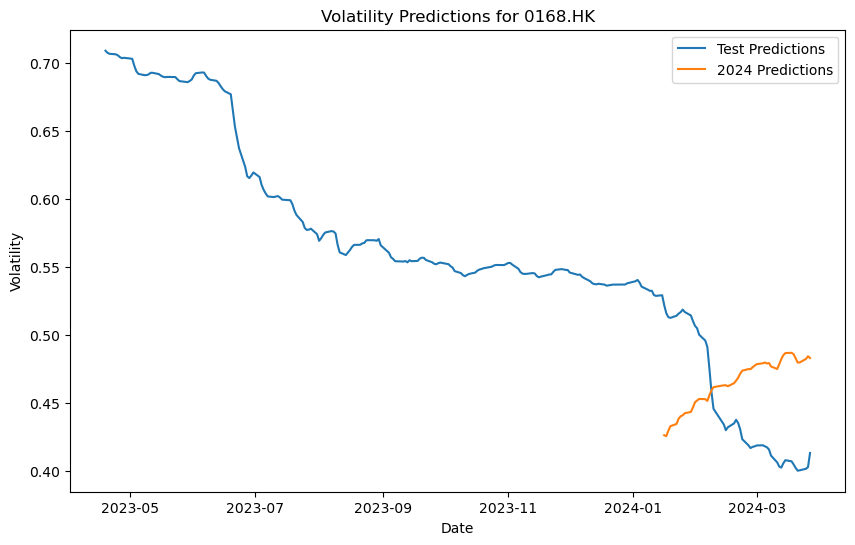

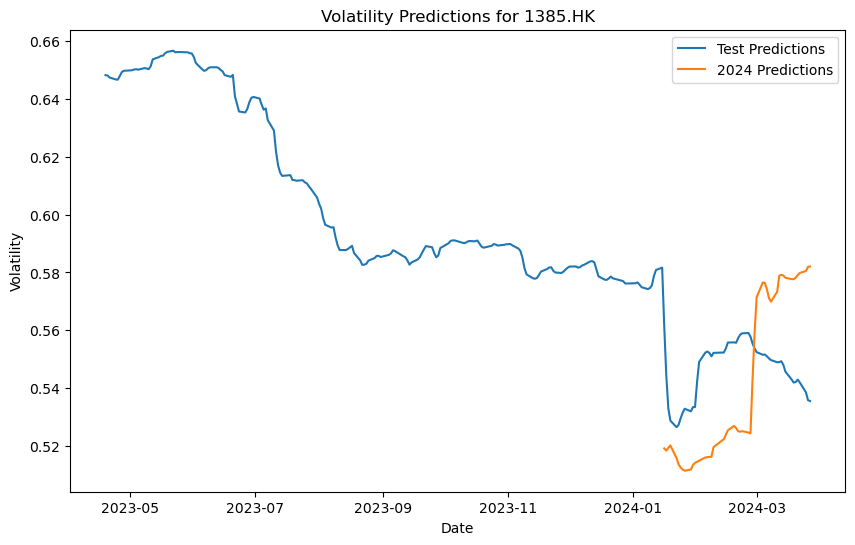

In [14]:
# importing the necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt
import matplotlib.pyplot as plt

#importing the data

tickers = ["0168.HK", "1385.HK"]
start_date = "2003-01-01"
end_date = "2024-03-28"

# Fetch historical data for the tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Prepare a clean DataFrame to avoid SettingWithCopyWarning
clean_data = pd.DataFrame(index=data.index)


# preprocessing the data

rolling_window = 250
for ticker in tickers:
    close_prices = data['Close'][ticker].dropna()
    log_returns = np.log(close_prices / close_prices.shift(1))
    volatility = log_returns.rolling(window=rolling_window).std() * sqrt(rolling_window)
    clean_data[f'Volatility_{ticker}'] = volatility

# Drop rows with NaN values that were introduced by rolling calculation
clean_data.dropna(inplace=True)

# Normalize the rolling volatility data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_volatility_data = {}
for ticker in tickers:
    scaled_volatility_data[ticker] = scaler.fit_transform(clean_data[f'Volatility_{ticker}'].values.reshape(-1, 1))
    
    
#preparing the data for the model

train_end = "2022-12-31"
test_start = "2023-01-01"
test_end = "2023-12-31"
predict_start = "2024-01-01"
predict_end = "2024-03-28"

# Split the data using the aligned indices
train_data = {ticker: scaled_volatility_data[ticker][clean_data.index <= train_end] for ticker in tickers}
test_data = {ticker: scaled_volatility_data[ticker][(clean_data.index >= test_start) & (clean_data.index <= test_end)] for ticker in tickers}
predict_data = {ticker: scaled_volatility_data[ticker][(clean_data.index >= predict_start) & (clean_data.index <= predict_end)] for ticker in tickers}




from tensorflow.keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True)




models = {}
look_back = 10

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

for ticker in tickers:
    X_train, Y_train = create_dataset(train_data[ticker], look_back)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
  
    
    model1 = Sequential([
                Bidirectional(LSTM(100, return_sequences=True, input_shape=(window, 1))),
                Dropout(0.3),
                Bidirectional(LSTM(100, return_sequences=True)),
                Dropout(0.3),
                Bidirectional(LSTM(50)),
                Dropout(0.2),
                Dense(1)
            ])
    model1.compile(optimizer='adam', loss='mean_squared_error')
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model1.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)
    models[ticker] = model

# Test and predict
test_predictions = {}
predict_predictions = {}
for ticker in tickers:
    X_test, _ = create_dataset(test_data[ticker], look_back)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    test_predictions[ticker] = models[ticker].predict(X_test)

    X_predict, _ = create_dataset(predict_data[ticker], look_back)
    X_predict = X_predict.reshape((X_predict.shape[0], X_predict.shape[1], 1))
    predict_predictions[ticker] = models[ticker].predict(X_predict)

    
    

    
for ticker in tickers:
    plt.figure(figsize=(10, 6))
    plt.plot(clean_data.index[-len(test_predictions[ticker]):], scaler.inverse_transform(test_predictions[ticker]), label='Test Predictions')
    plt.plot(clean_data.index[-len(predict_predictions[ticker]):], scaler.inverse_transform(predict_predictions[ticker]), label='2024 Predictions')
    plt.title(f'Volatility Predictions for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()



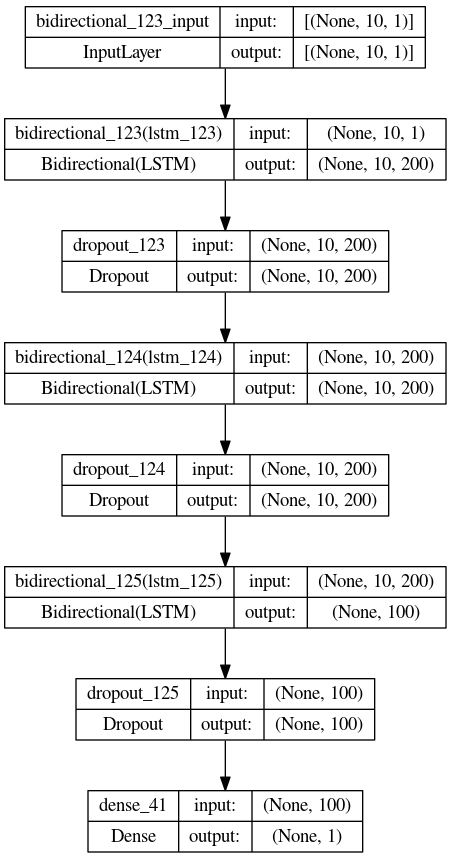

In [15]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(model1, to_file='model_val_early_stopping.png', show_shapes=True, show_layer_names=True)